#INSTALLING DEPENDENCIES

In [1]:
! pip install gym

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [43]:
import numpy as np
import random
import gym
from gym import spaces
import matplotlib.pyplot as plt

In [44]:
from google.colab import widgets
import time

#GRID DESIGN

In [45]:
grid = np.zeros((4, 4))
print(grid)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [46]:
pos1 = [0, 0] #start position of agent
pos2 = [0, 3] #position of diamond in the grid
pos3 = [2, 3] #position of coin in the grid
pos4 = [1, 2] #position of fire(negative reward) in the grid
pos5 = [2, 1] #position of wall(negative reward) in the grid
pos6 = [3, 3] #position of end goal

In [47]:
grid[tuple(pos1)] = 120 #start position of agent
grid[tuple(pos2)] = 80  #position of diamond in the grid
grid[tuple(pos3)] = 60  #position of coin in the grid
grid[tuple(pos4)] = -30 #position of fire(negative reward) in the grid
grid[tuple(pos5)] = -20 #position of wall(negative reward) in the grid
grid[tuple(pos6)] = 100 #position of end goal

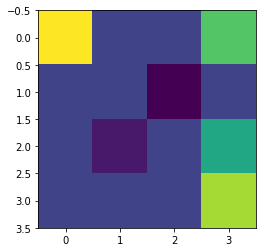

In [48]:
plt.imshow(grid)

#DETERMINISTIC ENVIRONMENT

In [92]:
class Deterministic_Environment(gym.Env):
    
    def __init__(self):
        self.observation_space = spaces.Discrete(16)
        self.action_space = spaces.Discrete(4)
        self.max_timesteps = 20
        
    def reset(self):
        self.timestep = 0
        self.agent_pos = [0, 0]
        self.diamond_pos = [0, 3]
        self.coin_pos = [2, 3]
        self.fire_pos = [1, 2]
        self.wall_pos = [2, 1]
        self.goal_pos = [3, 3]
        self.state = np.zeros((4, 4))
        self.state[tuple(self.agent_pos)] = 120
        self.state[tuple(self.diamond_pos)] = 80
        self.state[tuple(self.coin_pos)] = 60
        self.state[tuple(self.fire_pos)] = -30
        self.state[tuple(self.wall_pos)] = -20
        self.state[tuple(self.goal_pos)] = 100
        observation = self.state.flatten()
        
        return observation
    
    def step(self, action):
        self.state = np.random.choice(self.observation_space.n)
        if action == 0:
          '''Move down'''
          self.agent_pos[0] += 1 
        if action == 1:
          '''Move up'''
          self.agent_pos[0] -= 1
        if action == 2:
          '''Move right'''
          self.agent_pos[1] += 1
        if action == 3:
          '''Move left'''
          self.agent_pos[1] -= 1
        ''' np.clip makes sure agent stays within bounds of grid'''  
        self.agent_pos = np.clip(self.agent_pos, 0, 3)
        
        self.state = np.zeros((4,4))
        self.state[tuple(self.agent_pos)] = 120
        self.state[tuple(self.diamond_pos)] = 80
        self.state[tuple(self.coin_pos)] = 60
        self.state[tuple(self.fire_pos)] = -30
        self.state[tuple(self.wall_pos)] = -20
        self.state[tuple(self.goal_pos)] = 100
        observation = self.state.flatten()
        
        reward = 0
        if (self.agent_pos == self.goal_pos).all():
            reward = 10
        if (self.agent_pos == self.diamond_pos).all():
            reward = 6
        if (self.agent_pos == self.coin_pos).all():
            reward = 3
        if (self.agent_pos == self.fire_pos).all():
            reward = -5
        if (self.agent_pos == self.wall_pos).all():
            reward = -1
            
        self.timestep += 1
        ''' tracks when the loop should end - either run out of timesteps or agent reaches end goal position '''
        done = True if self.timestep >= self.max_timesteps  or (tuple(self.agent_pos) == tuple(self.goal_pos)) else False
        
        info = {}
        
        return observation, reward, done, info
    
    def render(self):
        plt.imshow(self.state)

#STOCHASTIC ENVIRONMENT

In [123]:
class Stochastic_Environment(gym.Env):
    
    def __init__(self):
        self.observation_space = spaces.Discrete(16)
        self.action_space = spaces.Discrete(4)
        self.max_timesteps = 20
        
    def reset(self):
        self.timestep = 0
        self.agent_pos = [0, 0]
        self.diamond_pos = [0, 3]
        self.coin_pos = [2, 3]
        self.fire_pos = [1, 2]
        self.wall_pos = [2, 1]
        self.goal_pos = [3, 3]
        self.state = np.zeros((4, 4))
        self.state[tuple(self.agent_pos)] = 120
        self.state[tuple(self.diamond_pos)] = 80
        self.state[tuple(self.coin_pos)] = 60
        self.state[tuple(self.fire_pos)] = -30
        self.state[tuple(self.wall_pos)] = -20
        self.state[tuple(self.goal_pos)] = 100
        observation = self.state.flatten()
        
        return observation
    
    def step(self, action):
        self.state = np.random.choice(self.observation_space.n)

        '''Generates random value between 0 and 1 for every action'''
        temp = random.uniform(0,1)

        '''3 states in the environment which are stochastic'''
        self.stochastic_pos1 = [3,0]
        self.stochastic_pos2 = [0,3]
        self.stochastic_pos3 = [2,2]

        '''If the agent comes to one of the stochastic states and temp variable is more than 0.4, the action is randomized'''
        if (tuple(self.agent_pos) == tuple(self.stochastic_pos1)) or (tuple(self.agent_pos) == tuple(self.stochastic_pos2)) or (tuple(self.agent_pos) == tuple(self.stochastic_pos3)):
          if temp > 0.4:
            action_new = random.choice([i for i in range(4) if i != action])
            action = action_new

        if action == 0:
          '''Moves down'''
          self.agent_pos[0] += 1
        if action == 1:
          '''Moves up'''
          self.agent_pos[0] -= 1
        if action == 2:
          '''Moves right'''
          self.agent_pos[1] += 1
        if action == 3:
          '''Moves left'''
          self.agent_pos[1] -= 1
        
        ''' np.clip makes sure agent stays within bounds of grid'''
        self.agent_pos = np.clip(self.agent_pos, 0, 3)

        self.state = np.zeros((4,4))
        self.state[tuple(self.agent_pos)] = 120
        self.state[tuple(self.diamond_pos)] = 80
        self.state[tuple(self.coin_pos)] = 60
        self.state[tuple(self.fire_pos)] = -30
        self.state[tuple(self.wall_pos)] = -20
        self.state[tuple(self.goal_pos)] = 100
        observation = self.state.flatten()
        
        reward = 0
        if (self.agent_pos == self.goal_pos).all():
            reward = 10
        if (self.agent_pos == self.diamond_pos).all():
            reward = 6
        if (self.agent_pos == self.coin_pos).all():
            reward = 3
        if (self.agent_pos == self.fire_pos).all():
            reward = -5
        if (self.agent_pos == self.wall_pos).all():
            reward = -1
            
        self.timestep += 1
        ''' tracks when the loop should end - either run out of timesteps or agent reaches end goal position '''
        done = True if self.timestep >= self.max_timesteps  or (tuple(self.agent_pos) == tuple(self.goal_pos)) else False
        
        info = {}
        
        return observation, reward, done, info
    
    def render(self):
        plt.imshow(self.state)

#RANDOM AGENT

In [93]:
class RandomAgent:
  def __init__(self, env):
    self.env = env
    self.observation_space = env.observation_space
    self.action_space = env.action_space

  def step(self, observation):
    return np.random.choice(self.action_space.n)

###Running the RandomAgent in Deterministic Environment

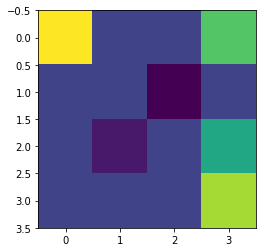

In [134]:
env = Deterministic_Environment()
agent = RandomAgent(env)
obs = env.reset()
env.render()

""


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

At timestep 0, Agent position: [0 0] Reward: 0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

At timestep 1, Agent position: [0 0] Reward: 0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

At timestep 2, Agent position: [0 0] Reward: 0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

At timestep 3, Agent position: [0 0] Reward: 0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

At timestep 4, Agent position: [0 0] Reward: 0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

At timestep 5, Agent position: [1 0] Reward: 0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

At timestep 6, Agent position: [1 1] Reward: 0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

At timestep 7, Agent position: [1 0] Reward: 0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

At timestep 8, Agent position: [1 0] Reward: 0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

At timestep 9, Agent position: [1 0] Reward: 0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

At timestep 10, Agent position: [0 0] Reward: 0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

At timestep 11, Agent position: [0 1] Reward: 0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

At timestep 12, Agent position: [1 1] Reward: 0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

At timestep 13, Agent position: [2 1] Reward: -1


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

At timestep 14, Agent position: [2 2] Reward: 0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

At timestep 15, Agent position: [3 2] Reward: 0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

At timestep 16, Agent position: [3 3] Reward: 10


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

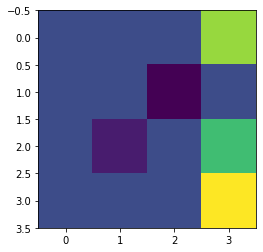

<IPython.core.display.Javascript object>

In [135]:
done = False

output_grid = widgets.Grid(1, 1)
with output_grid.output_to(0, 0):
  env.render()

i=0
while not done:
  action = agent.step(obs)
  obs, reward, done, info = env.step(action)
  print("At timestep " + str(i) + ", Agent position: " + str(env.agent_pos) + " Reward: " + str(reward))
  i = i + 1
  with output_grid.output_to(0, 0):
    output_grid.clear_cell()
    env.render()
  time.sleep(1)

###Running the RandomAgent in Stochastic Environment

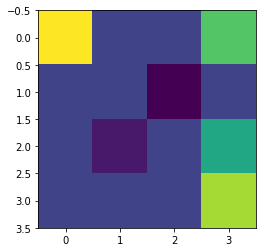

In [130]:
env = Stochastic_Environment()
agent = RandomAgent(env)
obs = env.reset()
env.render()

""


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

At timestep 0, Agent position: [0 0] Reward: 0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

At timestep 1, Agent position: [0 0] Reward: 0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

At timestep 2, Agent position: [0 1] Reward: 0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

At timestep 3, Agent position: [0 1] Reward: 0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

At timestep 4, Agent position: [0 1] Reward: 0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

At timestep 5, Agent position: [1 1] Reward: 0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

At timestep 6, Agent position: [1 2] Reward: -5


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

At timestep 7, Agent position: [2 2] Reward: 0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

At timestep 8, Agent position: [2 3] Reward: 3


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

At timestep 9, Agent position: [3 3] Reward: 10


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

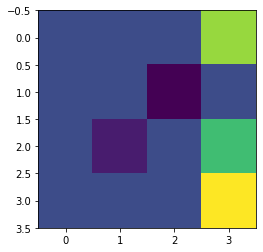

<IPython.core.display.Javascript object>

In [131]:
done = False

output_grid = widgets.Grid(1, 1)
with output_grid.output_to(0, 0):
  env.render()

i=0
while not done:
  action = agent.step(obs)
  obs, reward, done, info = env.step(action)
  print("At timestep " + str(i) + ", Agent position: " + str(env.agent_pos) + " Reward: " + str(reward))
  i = i + 1
  with output_grid.output_to(0, 0):
    output_grid.clear_cell()
    env.render()
  time.sleep(1)